<a href="https://colab.research.google.com/github/barish-bit/Neural_Network-based_Climate_Data_Forecasting/blob/main/Nbeats_recent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
pip install keras-beats

In [ ]:
import pandas as pd
dff=pd.read_csv("/content/final_output2.csv")
dff.head()

,Dates,Mean_temp
0,1994-01-01,18.4250
1,1994-01-02,19.6250
2,1994-01-03,20.6000
3,1994-01-04,20.7625
4,1994-01-05,20.1750


In [ ]:
# import libraries
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
df = pd.read_csv('/content/final_output2.csv', parse_dates = ['Dates'], index_col = 'Dates')
# sort by dates
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['Mean_temp'], lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)



#nbeats = NBeatsModel(model_type = 'generic', lookback = 3, horizon = 1, batch_size=1024)

nbeats=NBeatsModel( model_type = 'generic', lookback = 3,horizon = 1,
                   num_generic_neurons = 256, num_generic_stacks = 15, num_generic_layers = 3,
                   num_trend_neurons = 256, num_trend_stacks = 3, num_trend_layers = 4,
                   num_seasonal_neurons= 4096, num_seasonal_stacks = 3, num_seasonal_layers= 4,
                   num_harmonics= 1, polynomial_term= 2, loss = 'mae', learning_rate= 0.001, batch_size = 1024)

nbeats.fit(X, y, epochs = 10, validation_data=(X_test,y_test))



Epoch 1/10
9/9 [==============================] - 29s 722ms/step - loss: 17.5697 - mae: 17.5697 - mape: 68.2669 - val_loss: 2.5825 - val_mae: 2.5825 - val_mape: 10.0112
Epoch 2/10
9/9 [==============================] - 5s 566ms/step - loss: 1.5131 - mae: 1.5131 - mape: 5.8813 - val_loss: 1.7005 - val_mae: 1.7005 - val_mape: 6.8832
Epoch 3/10
9/9 [==============================] - 5s 550ms/step - loss: 1.1524 - mae: 1.1524 - mape: 4.4828 - val_loss: 1.4850 - val_mae: 1.4850 - val_mape: 5.8778
Epoch 4/10
9/9 [==============================] - 2s 273ms/step - loss: 1.0681 - mae: 1.0681 - mape: 4.1411 - val_loss: 1.4646 - val_mae: 1.4646 - val_mape: 5.8723
Epoch 5/10
9/9 [==============================] - 4s 427ms/step - loss: 1.0502 - mae: 1.0502 - mape: 4.0712 - val_loss: 1.4379 - val_mae: 1.4379 - val_mape: 5.7347
Epoch 6/10
9/9 [==============================] - 3s 280ms/step - loss: 1.0425 - mae: 1.0425 - mape: 4.0430 - val_loss: 1.4369 - val_mae: 1.4369 - val_mape: 5.7388
Epoch 7/10


In [ ]:
nbeats.evaluate(X_test, y_test)

32/32 [==============================] - 0s 9ms/step - loss: 1.4521 - mae: 1.4521 - mape: 5.8218


[1.4520512819290161, 1.4520512819290161, 5.821808815002441]

In [ ]:
forecasts=nbeats.predict(X_test)

32/32 [==============================] - 1s 10ms/step


In [ ]:
print(len(forecasts))

1000


In [ ]:
df1=pd.read_csv("/content/final_output2.csv")
obs=df1["Mean_temp"][-1000:].tolist()


exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df1["Mean_temp"][-1000:].tolist())

[[27.319326400756836], [29.627952575683594], [30.115577697753906], [30.169384002685547], [30.196908950805664], [29.79845428466797], [30.294403076171875], [30.91395378112793], [28.573476791381836], [26.519466400146484], [27.153667449951172], [29.041208267211914], [29.522565841674805], [31.033193588256836], [30.755504608154297], [30.5074520111084], [29.70811653137207], [27.256025314331055], [26.639307022094727], [26.385066986083984], [27.416738510131836], [28.121318817138672], [26.26194190979004], [25.689207077026367], [26.424964904785156], [27.298288345336914], [27.07720184326172], [27.108781814575195], [28.10642433166504], [27.488529205322266], [27.631271362304688], [27.936851501464844], [27.597328186035156], [25.746816635131836], [22.9548282623291], [23.50909996032715], [25.583385467529297], [27.297412872314453], [27.732746124267578], [28.290552139282227], [28.05588722229004], [27.36602783203125], [27.79863739013672], [25.220722198486328], [27.123863220214844], [27.79608917236328], [2

In [ ]:
'''pred=[]
for i in range (1000):
  pred.append((forecasts[i][0]+forecasts[i][1]+forecasts[i][2])/3)
print(len(pred))'''

'pred=[]\nfor i in range (1000):\n  pred.append((forecasts[i][0]+forecasts[i][1]+forecasts[i][2])/3)\nprint(len(pred))'

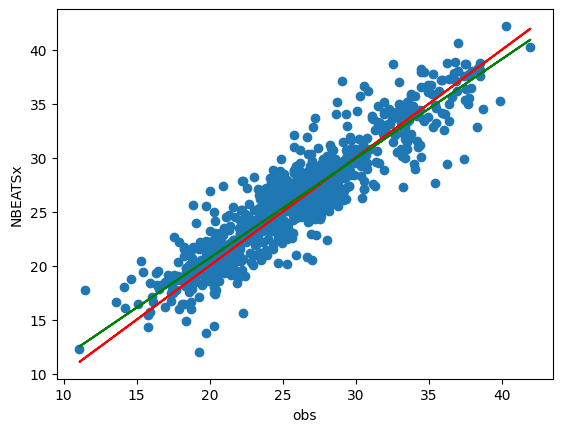

[-2.0556735992431605, -0.24704742431641336, 0.1780776977539098, 0.21938400268554403, 0.6219089508056754, -0.30154571533203267, -0.39309692382812855, 2.6014537811279297, 2.2984767913818374, -0.4055335998535199, -1.6588325500488317, -0.23379173278808452, -1.227434158325206, 0.5331935882568359, 0.5305046081543026, 1.0824520111083977, 2.7206165313720803, 0.8310253143310504, 0.5393070220947358, -0.839933013916017, -0.4582614898681676, 2.121318817138672, 0.8369419097900348, -0.4857929229736335, -0.600035095214853, 0.49828834533691335, 0.2397018432617095, -0.7349681854248118, 0.9314243316650384, 0.0760292053222642, -0.04372863769530255, 0.5868515014648423, 2.0723281860351435, 3.034316635131848, -0.320171737670897, -1.840900039672853, -1.4541145324707045, -0.19008712768555824, -0.3047538757324233, 0.4655521392822237, 0.9308872222900426, -0.17147216796874432, 2.848637390136716, -1.6792778015136705, -0.43863677978515625, -0.39141082763671875, -0.13155021667480327, 0.2705142974853523, 1.899314498

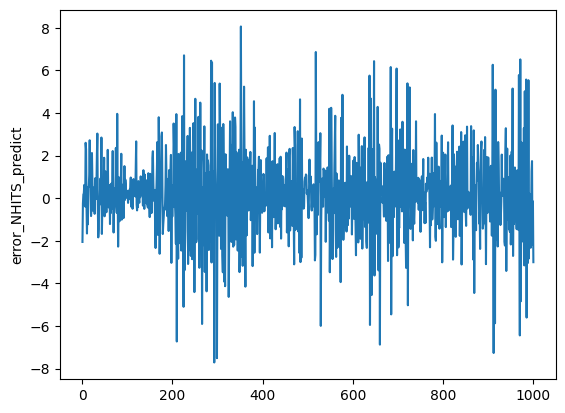

max_error 8.063997650146476
min_error -7.7164348602294695
sd_error 1.9818028964468073
error
median 0.23253765106200852
25_parcentile -0.7849878946940185
75_parcentile 1.2473861694335913
mae 1.4520512708874658
mse 3.9848502108674864
var_obs 23.508105830899513
var_exp_pred 23.708602151938386
var_error 3.927542720364955
co_variance 21.66624888011659
co_variance_matrix [[23.53163747 21.66624888]
 [21.66624888 23.73233449]]


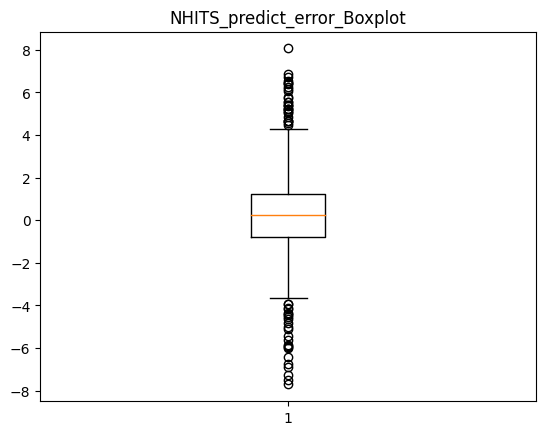

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/final_output2.csv")
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)

In [ ]:
# helper dataframe to make plotting easier
preds = pd.DataFrame(index = np.arange(len(y_train) + len(y_test)))
preds['real'] = np.hstack([y_train[:, 0], y_test[:, 0]])
preds['Pred'] = np.hstack([nbeats.predict(X_train)[:, 0], nbeats.predict(X_test)[:, 0]])


32/32 [==============================] - 0s 9ms/step


In [ ]:
# and plot the predictions
import plotly.express as px
fig = px.line(preds[['real', 'Pred']], title = 'Real vs Predicted Values for N-Beats')
# random formatting stuff
fig.add_vline(x = 1164)
fig.add_annotation(x = 1000, y = 10,text='Training Data',font=dict(size=15),showarrow=False)
fig.add_annotation(x = 1300, y = 10, text='Test Data',font=dict(size=15),showarrow=False)

In [ ]:
import math

sin=[]
for i in range ((10000)):
  sin.append(np.sin((i*0.01)))

x=[]
for i in range (10000):
  x.append((i*0.01))

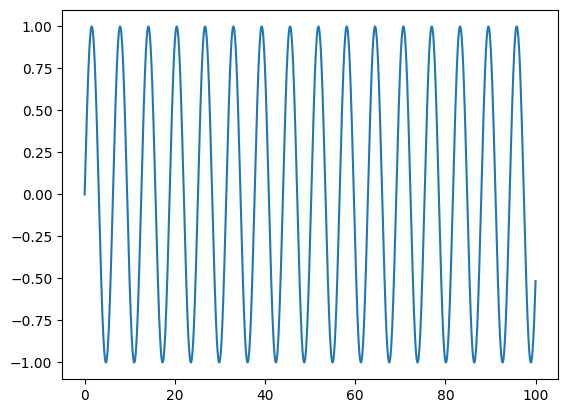

In [ ]:
plt.plot(x, sin)

In [ ]:
sd=pd.DataFrame({"x":x,'sin':sin})

In [ ]:
# import libraries
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
# import the dataset
#df = pd.read_csv('/content/final_output2.csv', parse_dates = ['Dates'], index_col = 'Dates')
# sort by dates
sd.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(sd['sin'], lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)



#nbeats = NBeatsModel(model_type = 'generic', lookback = 3, horizon = 1, batch_size=1024)

nbeats=NBeatsModel( model_type = 'generic', lookback = 3, horizon = 1, num_generic_neurons = 216, num_generic_stacks = 30, num_generic_layers = 4, num_trend_neurons = 256, num_trend_stacks = 3, num_trend_layers = 4, num_seasonal_neurons= 2048, num_seasonal_stacks = 3, num_seasonal_layers= 4, num_harmonics= 1, polynomial_term= 2, loss = 'mae', learning_rate= 0.001, batch_size = 1024)

nbeats.fit(X, y, epochs = 5,validation_data=(X_test,y_test))

Epoch 1/5
10/10 [==============================] - 37s 898ms/step - loss: 0.7548 - mae: 0.7548 - mape: 503.2870 - val_loss: 0.0520 - val_mae: 0.0520 - val_mape: 20.6930
Epoch 2/5
10/10 [==============================] - 6s 618ms/step - loss: 0.0400 - mae: 0.0400 - mape: 25.9074 - val_loss: 0.0123 - val_mae: 0.0123 - val_mape: 8.0644
Epoch 3/5
10/10 [==============================] - 7s 648ms/step - loss: 0.0235 - mae: 0.0235 - mape: 15.8590 - val_loss: 0.0122 - val_mae: 0.0122 - val_mape: 10.8851
Epoch 4/5
10/10 [==============================] - 6s 572ms/step - loss: 0.0215 - mae: 0.0215 - mape: 12.3327 - val_loss: 0.0162 - val_mae: 0.0162 - val_mape: 7.9906
Epoch 5/5
10/10 [==============================] - 7s 650ms/step - loss: 0.0345 - mae: 0.0345 - mape: 21.5154 - val_loss: 0.0272 - val_mae: 0.0272 - val_mape: 13.6794


In [ ]:
nbeats.evaluate(X_test, y_test)

32/32 [==============================] - 0s 14ms/step - loss: 0.0330 - mae: 0.0330 - mape: 15.7637


[0.03302716836333275, 0.03302716836333275, 15.763671875]

In [ ]:
forecasts=nbeats.predict(X_test)

32/32 [==============================] - 2s 14ms/step


In [ ]:
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)

[[0.9691696166992188], [0.9652635455131531], [0.9612607955932617], [0.9571612477302551], [0.9529675841331482], [0.9486814737319946], [0.9443068504333496], [0.9398356080055237], [0.9352682828903198], [0.9306102991104126], [0.9258580207824707], [0.9210126996040344], [0.916080117225647], [0.9110564589500427], [0.9059366583824158], [0.9007180333137512], [0.8954015970230103], [0.8899980187416077], [0.8845081329345703], [0.878923237323761], [0.8732512593269348], [0.8674935102462769], [0.8616529703140259], [0.8557303547859192], [0.8497194647789001], [0.8436269760131836], [0.8374488353729248], [0.8311871290206909], [0.8248448371887207], [0.8184208869934082], [0.8119179010391235], [0.8053372502326965], [0.7656759023666382], [0.7592506408691406], [0.7527516484260559], [0.7462000846862793], [0.7396104335784912], [0.7329556941986084], [0.726240873336792], [0.7194707989692688], [0.7126641869544983], [0.7057992815971375], [0.6988575458526611], [0.6918336153030396], [0.6847375631332397], [0.677547752

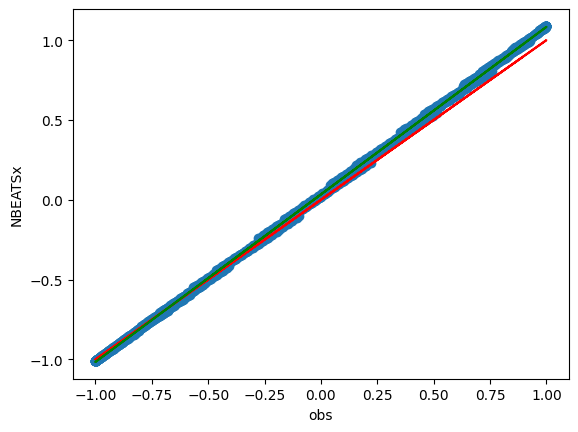

[0.0751729530986609, 0.07579224285600927, 0.07640380026856752, 0.07700704470017128, 0.07760418808451841, 0.07819642027494977, 0.07878718734784051, 0.07936788653659499, 0.0799385490930572, 0.08050408524543062, 0.0810603367627365, 0.08160802449394666, 0.08215239079322278, 0.08268907327297992, 0.08321244950898621, 0.08371927297924109, 0.08420998442261474, 0.08469467236060435, 0.0851735824365134, 0.08563741549758186, 0.08609349409375544, 0.08654251672665803, 0.08698684295652026, 0.08742655955771861, 0.0878548314192672, 0.08827769035057842, 0.08869043170645796, 0.08909448256675645, 0.08949215659356502, 0.08988170691229902, 0.09026507478294521, 0.09064294248270921, 0.05801158195804024, 0.058687073644244636, 0.05935889015779339, 0.060047474072651874, 0.06076658530875778, 0.06148849209190521, 0.062217463553764896, 0.06295758329755574, 0.0637268161685739, 0.06450264889329027, 0.06526578035976027, 0.06601007566964301, 0.06674483119178187, 0.06744762736590215, 0.0681546298176855, 0.06885580447221

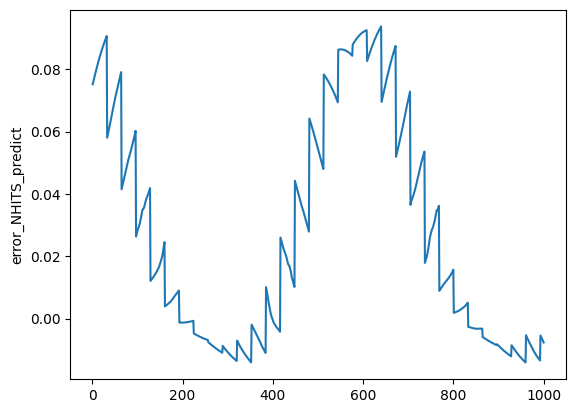

max_error 0.09370443925013683
min_error -0.014106916903528388
sd_error 0.03608627577121395
error
median 0.014072628730579018
25_parcentile -0.0062901269785848035
75_parcentile 0.05988268334445235
mae 0.03302717011227764
mse 0.0020441237274064594
var_obs 0.4850869804441183
var_exp_pred 0.5344233057608443
var_error 0.001302219299036103
co_variance 0.5096136471000634
co_variance_matrix [[0.48557255 0.50961365]
 [0.50961365 0.53495826]]


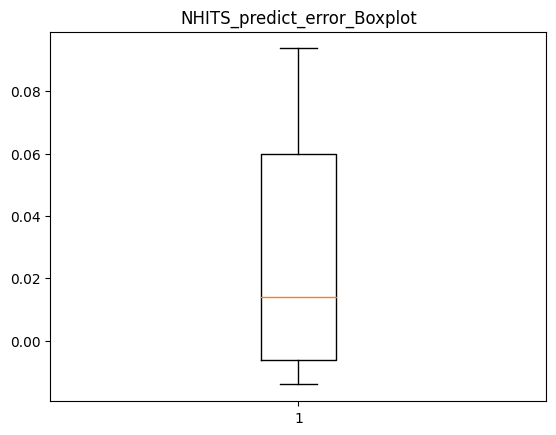

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/final_output2.csv")
obs=sd["sin"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=sd["sin"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)

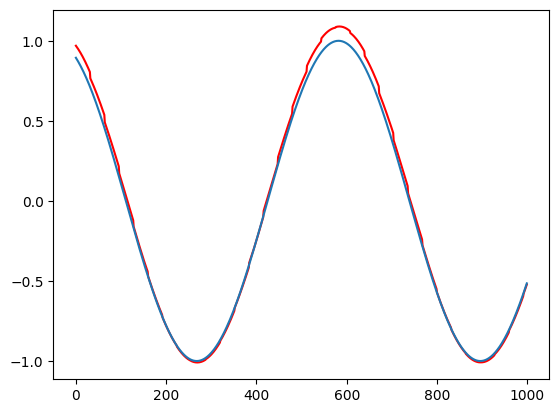

In [ ]:
plt.plot(range(0,1000),pred,color='r')
plt.plot(range(0,1000),sin[-1000:])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('/content/final_output2.csv',index_col='Dates',parse_dates=True)


#x_train = df.iloc[:-1000]
#test = df.iloc[-1000:]
df.sort_index(inplace = True)
# prep a univariate time series for N-Beats
X, y = prep_time_series(df['Mean_temp'], lookback = 3, horizon = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)

#from keras.preprocessing.sequence import TimeseriesGenerator

#n_features = 1
#generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)

#n_input = 3
#generator = TimeseriesGenerator(X_train, y_train , length=n_input)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

model.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test), batch_size=1024)
model.evaluate(X_test,y_test)







Epoch 1/100
8/8 [==============================] - 2s 76ms/step - loss: 25.6956 - val_loss: 22.5581
Epoch 2/100
8/8 [==============================] - 0s 39ms/step - loss: 20.9283 - val_loss: 16.8886
Epoch 3/100
8/8 [==============================] - 0s 42ms/step - loss: 13.3054 - val_loss: 6.1929
Epoch 4/100
8/8 [==============================] - 0s 38ms/step - loss: 3.9061 - val_loss: 4.5444
Epoch 5/100
8/8 [==============================] - 0s 37ms/step - loss: 2.8098 - val_loss: 2.8035
Epoch 6/100
8/8 [==============================] - 0s 38ms/step - loss: 2.3069 - val_loss: 1.9157
Epoch 7/100
8/8 [==============================] - 0s 38ms/step - loss: 1.8465 - val_loss: 1.8299
Epoch 8/100
8/8 [==============================] - 0s 37ms/step - loss: 1.6409 - val_loss: 1.7979
Epoch 9/100
8/8 [==============================] - 0s 39ms/step - loss: 1.5277 - val_loss: 1.7446
Epoch 10/100
8/8 [==============================] - 0s 39ms/step - loss: 1.4538 - val_loss: 1.7069
Epoch 11/100
8

1.3961102962493896

In [ ]:
f=model.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [ ]:
print((f.tolist()))

[[27.402658462524414], [29.60472297668457], [29.789506912231445], [30.049089431762695], [30.09880828857422], [29.759822845458984], [30.24388885498047], [30.740684509277344], [28.597095489501953], [26.69666290283203], [27.225549697875977], [28.765005111694336], [29.241151809692383], [30.728248596191406], [30.550447463989258], [30.412778854370117], [29.65851593017578], [27.348447799682617], [26.80299186706543], [26.350696563720703], [27.35509490966797], [27.907337188720703], [26.26205825805664], [25.77899742126465], [26.359859466552734], [27.078777313232422], [26.934852600097656], [27.037214279174805], [27.945341110229492], [27.329681396484375], [27.629831314086914], [27.817493438720703], [27.534059524536133], [25.842159271240234], [23.186233520507812], [23.67889404296875], [25.300674438476562], [26.856800079345703], [27.488468170166016], [28.13750648498535], [27.97666358947754], [27.36719512939453], [27.745567321777344], [25.26901626586914], [27.182462692260742], [27.515941619873047], [

In [ ]:
exp_pred=f.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df1["Mean_temp"][-1000:].tolist())

[[27.402658462524414], [29.60472297668457], [29.789506912231445], [30.049089431762695], [30.09880828857422], [29.759822845458984], [30.24388885498047], [30.740684509277344], [28.597095489501953], [26.69666290283203], [27.225549697875977], [28.765005111694336], [29.241151809692383], [30.728248596191406], [30.550447463989258], [30.412778854370117], [29.65851593017578], [27.348447799682617], [26.80299186706543], [26.350696563720703], [27.35509490966797], [27.907337188720703], [26.26205825805664], [25.77899742126465], [26.359859466552734], [27.078777313232422], [26.934852600097656], [27.037214279174805], [27.945341110229492], [27.329681396484375], [27.629831314086914], [27.817493438720703], [27.534059524536133], [25.842159271240234], [23.186233520507812], [23.67889404296875], [25.300674438476562], [26.856800079345703], [27.488468170166016], [28.13750648498535], [27.97666358947754], [27.36719512939453], [27.745567321777344], [25.26901626586914], [27.182462692260742], [27.515941619873047], [

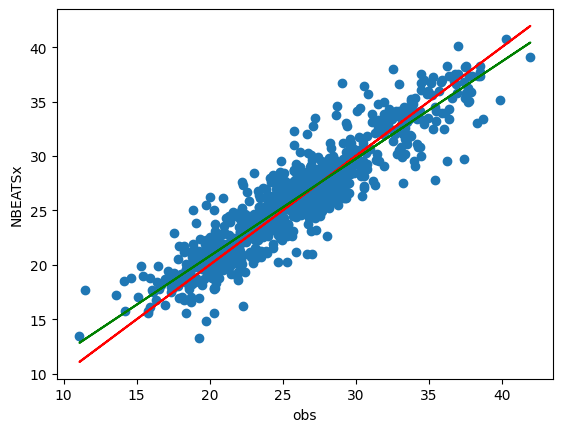

[-1.9723415374755824, -0.2702770233154368, -0.14799308776855113, 0.09908943176269247, 0.5238082885742301, -0.34017715454101705, -0.4436111450195348, 2.4281845092773438, 2.3220954895019545, -0.228337097167973, -1.586950302124027, -0.5099948883056626, -1.5088481903076278, 0.22824859619140625, 0.3254474639892635, 0.9877788543701165, 2.671015930175791, 0.9234477996826129, 0.7029918670654389, -0.8743034362792983, -0.5199050903320348, 1.9073371887207031, 0.8370582580566364, -0.3960025787353523, -0.6651405334472749, 0.27877731323242116, 0.09735260009764701, -0.8065357208252024, 0.7703411102294915, -0.08281860351562642, -0.04516868591307599, 0.4674934387207017, 2.00905952453612, 3.1296592712402465, -0.08876647949218608, -1.6711059570312514, -1.736825561523439, -0.6306999206543082, -0.5490318298339858, 0.3125064849853487, 0.8516635894775426, -0.17030487060546307, 2.795567321777341, -1.630983734130858, -0.3800373077392578, -0.6715583801269531, -0.3259338378906236, 0.10459976196289134, 1.81723937

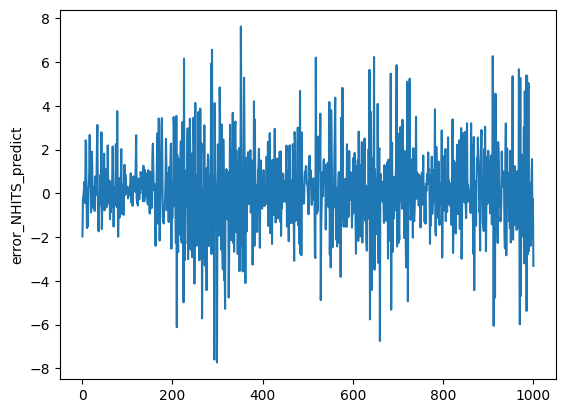

max_error 7.6329406738281165
min_error -7.734461593627913
sd_error 1.903606970679054
error
median 0.19165649414062358
25_parcentile -0.835530471801766
75_parcentile 1.0988390922546394
mae 1.3961101390231907
mse 3.651023478341746
var_obs 23.508105830899513
var_exp_pred 22.133767774730426
var_error 3.6237194988178842
co_variance 21.030107160566594
co_variance_matrix [[23.53163747 21.03010716]
 [21.03010716 22.1559237 ]]


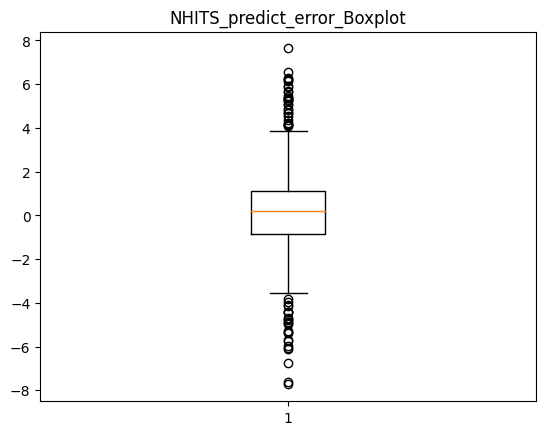

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/final_output2.csv")
obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df1["Mean_temp"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)

In [ ]:
d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
print(d)

[[0.25763467]
 [0.29009258]
 [0.31646463]
 ...
 [0.55922276]
 [0.56936586]
 [0.65687825]]


In [ ]:
# import libraries
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 1000)

#print(X_train)

#nbeats = NBeatsModel(model_type = 'generic', lookback = 3, horizon = 1, batch_size=1024)

nbeats=NBeatsModel( model_type = 'generic', lookback = 3, horizon = 1, num_generic_neurons = 256, num_generic_stacks = 15, num_generic_layers = 3, num_trend_neurons = 256, num_trend_stacks = 3, num_trend_layers = 4, num_seasonal_neurons= 4096, num_seasonal_stacks = 3, num_seasonal_layers= 4, num_harmonics= 1, polynomial_term= 2, loss = 'mae', learning_rate= 0.001, batch_size = 1024)

nbeats.fit(X, y, epochs = 10, validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 20s 698ms/step - loss: 0.4639 - mae: 0.4639 - mape: 6906.6768 - val_loss: 0.0647 - val_mae: 0.0647 - val_mape: 14.9704
Epoch 2/10
9/9 [==============================] - 2s 278ms/step - loss: 0.0556 - mae: 0.0556 - mape: 37614.5742 - val_loss: 0.0509 - val_mae: 0.0509 - val_mape: 11.8735
Epoch 3/10
9/9 [==============================] - 2s 275ms/step - loss: 0.0343 - mae: 0.0343 - mape: 18824.8926 - val_loss: 0.0424 - val_mae: 0.0424 - val_mape: 10.5231
Epoch 4/10
9/9 [==============================] - 2s 265ms/step - loss: 0.0308 - mae: 0.0308 - mape: 23393.2676 - val_loss: 0.0387 - val_mae: 0.0387 - val_mape: 9.3973
Epoch 5/10
9/9 [==============================] - 4s 422ms/step - loss: 0.0292 - mae: 0.0292 - mape: 21163.4785 - val_loss: 0.0393 - val_mae: 0.0393 - val_mape: 9.4191
Epoch 6/10
9/9 [==============================] - 5s 515ms/step - loss: 0.0286 - mae: 0.0286 - mape: 21140.1309 - val_loss: 0.0390 - val_mae: 0.0390 - val_ma

In [ ]:
f=nbeats.predict(X_test)

32/32 [==============================] - 2s 22ms/step


In [ ]:
exp_pred=f.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df1["Mean_temp"][-1000:].tolist())

[[0.48892515897750854], [0.5513426065444946], [0.5644598007202148], [0.5664626359939575], [0.5669451355934143], [0.5562605857849121], [0.570223331451416], [0.5867265462875366], [0.5223248600959778], [0.4678039848804474], [0.4845009744167328], [0.5360904932022095], [0.548427164554596], [0.5887861847877502], [0.5824142098426819], [0.574399471282959], [0.5528526902198792], [0.4864492118358612], [0.4719587564468384], [0.46214619278907776], [0.4931165277957916], [0.510239839553833], [0.46149325370788574], [0.44534724950790405], [0.4650261402130127], [0.4883289933204651], [0.481801301240921], [0.48284712433815], [0.5098251104354858], [0.4912351667881012], [0.497591495513916], [0.5057939291000366], [0.4958917796611786], [0.4469527304172516], [0.37100639939308167], [0.3861357271671295], [0.4423445761203766], [0.4878223240375519], [0.5006642937660217], [0.5154314637184143], [0.5088536143302917], [0.4905911386013031], [0.5013715028762817], [0.4318143129348755], [0.4838135540485382], [0.501921117

In [ ]:
l=d[-1000:].tolist()
obs1=[]
for i in range (len(l)):
  obs1.append(l[i][0])

[0.5538131084615308, 0.5673372380942913, 0.5690277542983859, 0.5693658575392051, 0.5592227603146346, 0.5734230964290331, 0.5893139487475265, 0.5250743329919153, 0.4699635047384174, 0.4875448732610058, 0.5385984626246757, 0.5511082825349787, 0.5910044649516217, 0.5842424001352413, 0.576804128837223, 0.5551655214248068, 0.4892353894651005, 0.47402074362824564, 0.46523005936695117, 0.49565935104066194, 0.5132407195632502, 0.4625252334403993, 0.4469724843627252, 0.46725867881186545, 0.490249699187558, 0.4841638408528157, 0.4851781505752729, 0.5123954614612029, 0.4943069380773859, 0.5007308996529469, 0.5078310677101457, 0.49904038344885193, 0.4496773102892775, 0.37360408110500054, 0.38881872694185604, 0.4449438649178111, 0.49058780242837685, 0.5027595190978613, 0.5176360616938972, 0.5118883065999742, 0.49295452511410975, 0.5041119320611368, 0.4341245612116029, 0.4868686667793677, 0.504788138542775, 0.5216933005837253, 0.5325126042899334, 0.5321745010491145, 0.4868686667793677, 0.51560744224

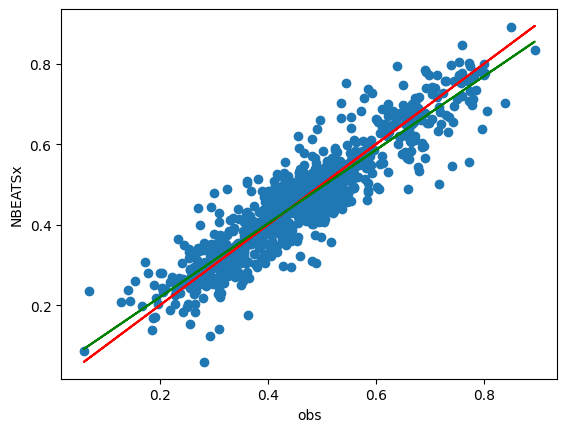

[-0.06488794948402221, -0.015994631549796634, -0.00456795357817108, -0.0029032215452475807, 0.007722375278779725, -0.017162510644121, -0.0190906172961105, 0.061652213295621316, 0.05236135535756037, -0.01974088838055843, -0.05409748820794291, -0.015017789332769205, -0.042577300397025786, 0.004543784652508931, 0.0056100810054589, 0.01923394985815219, 0.06361730075477867, 0.012428468207615562, 0.006728697079887214, -0.033513158251584185, -0.02012419176745861, 0.0477146061134337, 0.014520769345160556, -0.021911429303961394, -0.025223558974545313, 0.004165152467649369, -0.0033768493343518946, -0.029548337123052826, 0.015518172358099935, -0.00949573286484573, -0.01023957219622973, 0.006753545651184689, 0.0462144693719011, 0.07334864931225105, -0.017812327548774376, -0.05880813775068161, -0.048243226308000264, -0.014937195060309438, -0.01697176792787547, 0.00354315711844011, 0.015899089216181994, -0.013520793459833702, 0.06724694166467882, -0.0550543538444922, -0.020974584494236836, -0.019772

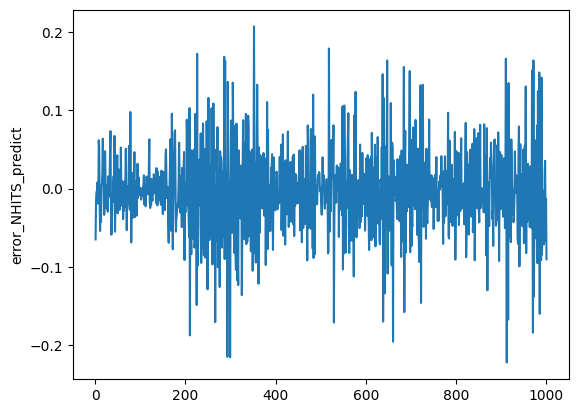

max_error 0.20687749954763168
min_error -0.22190761295055117
sd_error 0.05364330683040923
error
median -0.002624816314808376
25_parcentile -0.029059268055634857
75_parcentile 0.024973708341809675
mae 0.038899876658722875
mse 0.0028832225983711412
var_obs 0.017198726031830026
var_exp_pred 0.017145685831746544
var_error 0.00287760436770143
co_variance 0.0157491529008384
co_variance_matrix [[0.01721594 0.01574915]
 [0.01574915 0.01716285]]


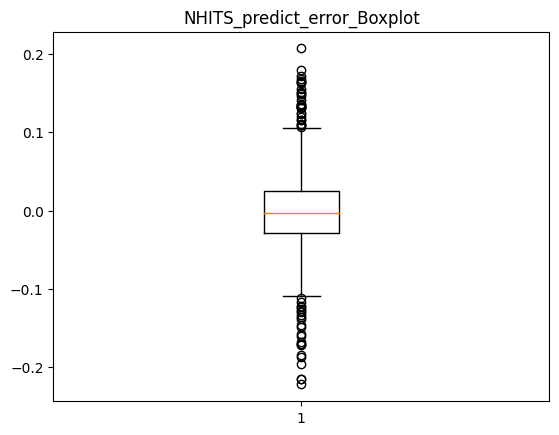

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

#df=pd.read_csv('/content/deep3.csv')
df1=pd.read_csv("/content/final_output2.csv")
obs=obs1
print(obs)
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=obs1
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)